In [1]:
#imports
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('notebook')
sns.set_style('white')
from scipy.io import loadmat
from sklearn import svm

pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
pd.set_option('display.max_seq_items', None)

In [2]:
def plotData(X, y ,S):
    pos = (y == 1).ravel() #from numpy ravel to make data filtration
    neg = (y == 0).ravel()
    plt.scatter(X[pos,0], X[pos,1], s=S, c='b', marker='+', linewidths=1)
    plt.scatter(X[neg,0], X[neg,1], s=S, c='r', marker='o', linewidths=1)


def plot_svc(svc, X, y, h=0.02, pad=0.25):
    x_min, x_max = X[:, 0].min()-pad, X[:, 0].max()+pad
    y_min, y_max = X[:, 1].min()-pad, X[:, 1].max()+pad
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.2)
    
    plotData(X, y,6)
    #plt.scatter(X[:,0], X[:,1], s=70, c=y, cmap=mpl.cm.Paired)
    # Support vectors indicated in plot by vertical lines
    sv = svc.support_vectors_
    plt.scatter(sv[:,0], sv[:,1], c='y', marker='|', s=100, linewidths='5')
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.show()
    print('Number of support vectors: ', svc.support_.size)

X2: (863, 2)
y2: (863, 1)


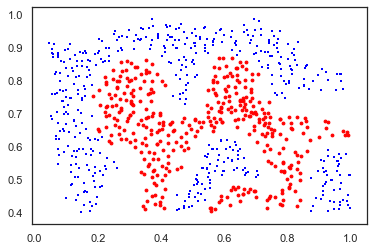

In [4]:
data2 = loadmat('ex6data2.mat')

#print(data2.keys())
y2 = data2['y']
X2 = data2['X']
print('X2:', X2.shape)
print('y2:', y2.shape)

plotData(X2, y2,8)

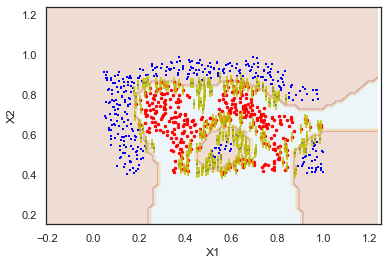

Number of support vectors:  254


In [5]:
#apply SVM
clf2 = svm.SVC(C=50, kernel='rbf', gamma=6)
clf2.fit(X2, y2.ravel())
plot_svc(clf2, X2, y2)